(2000, 2000, 3)
hey (2000, 2000, 3)


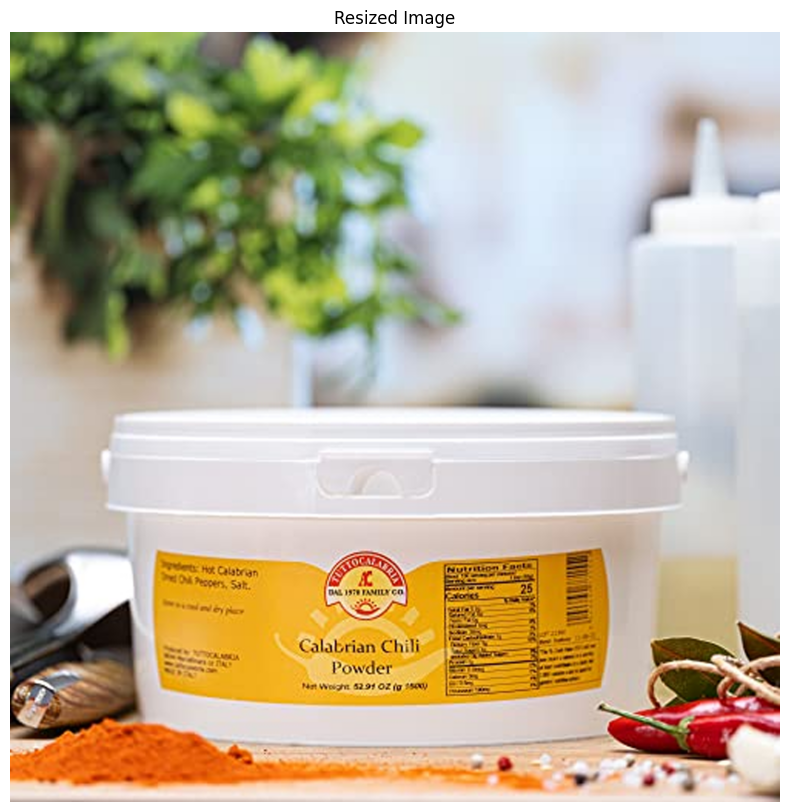

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def resize_image(image, scale_percent):
    """
    Resize the image while attempting to preserve text features.
    
    Parameters:
        image (np.ndarray): Input image.
        scale_percent (float): Scale percentage to resize the image.
    
    Returns:
        np.ndarray: Resized image.
    """
    # Get the original dimensions
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dimensions = (width, height)

    # Resize the image using interpolation
    resized_image = cv2.resize(image, dimensions, interpolation=cv2.INTER_CUBIC)
    print(resized_image.shape)
    
    return resized_image

def display_image(image, title="Image"):
    """
    Display an image using matplotlib.
    
    Parameters:
        image (np.ndarray): Image to be displayed.
        title (str): Title of the image.
    """
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print("hey", image_rgb.shape)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

def save_image(image, output_path):
    """
    Save the image to the specified file path.
    
    Parameters:
        image (np.ndarray): Image to be saved.
        output_path (str): Path to save the image.
    """
    if image is None:
        raise ValueError("Image not loaded. Check the image processing steps.")
    
    # Save the image to disk
    success = cv2.imwrite(output_path, image)
    if not success:
        raise IOError(f"Failed to save the image to {output_path}")

def main(image_path, scale_percent):
    # Load the image
    image = cv2.imread(image_path)
    
    # Resize the image
    resized_image = resize_image(image, scale_percent)
    save_image(resized_image, "resized-output.jpg")
    
    # Display the resized image
    display_image(resized_image, title="Resized Image")

# Path to your image file
image_path = r'D:\Programs\DataScience\AmazonML\images\sample\41ADVPQgZOL.jpg'
scale_percent = 400  # Increase size by 150%
main(image_path, scale_percent)


d:\Programs\DataScience\AmazonML\env\lib\site-packages\easyocr\detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(tr

output
Text: Qvantum
Coordinates: Top Left: [np.int32(535), np.int32(215)], Bottom Right: [np.int32(779), np.int32(295)]
Text: Naturals
Coordinates: Top Left: [np.int32(560), np.int32(270)], Bottom Right: [np.int32(759), np.int32(318)]
Text: QuantoClilletex
Coordinates: Top Left: [np.int32(365), np.int32(451)], Bottom Right: [np.int32(943), np.int32(622)]
Text: Husk and Fennel
Coordinates: Top Left: [np.int32(694), np.int32(619)], Bottom Right: [np.int32(882), np.int32(669)]
Text: With
Coordinates: Top Left: [np.int32(545), np.int32(649)], Bottom Right: [np.int32(608), np.int32(686)]
Text: with Date Syrup
Coordinates: Top Left: [np.int32(640), np.int32(674)], Bottom Right: [np.int32(784), np.int32(706)]
Text: for boosting energy
Coordinates: Top Left: [np.int32(610), np.int32(736)], Bottom Right: [np.int32(848), np.int32(790)]
Text: All day
Coordinates: Top Left: [np.int32(443), np.int32(775)], Bottom Right: [np.int32(537), np.int32(811)]
Text: FROM
Coordinates: Top Left: [np.int32(411

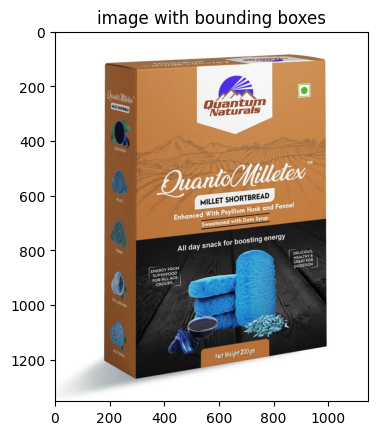

In [68]:
import os
import easyocr

def bound_crop(image, folder_name, margin=0):
    # Initialize the OCR reader
    reader = easyocr.Reader(["en"])  # Specify language(s)

    # Create a folder named after the parent image
    parent_folder = os.path.splitext(os.path.basename(folder_name))[0]
    os.makedirs(parent_folder, exist_ok=True)
    print(parent_folder)

    # Perform OCR
    results = reader.readtext(image)

    # Process the results
    for idx, (bbox, text, prob) in enumerate(results, start=1):
        # Get coordinates
        (top_left, top_right, bottom_right, bottom_left) = bbox

        # Print text and coordinates
        print(f"Text: {text}")
        print(f"Coordinates: Top Left: {top_left}, Bottom Right: {bottom_right}")

        # Draw bounding box on image (optional)
        # cv2.rectangle(
        #     image,
        #     tuple(map(int, top_left)),
        #     tuple(map(int, bottom_right)),
        #     (0, 255, 0),
        #     2,
        # )

        


        # Crop the image
        x1, y1 = map(int, top_left)
        x2, y2 = map(int, bottom_right)

        # Adding margins
        x1 -= margin
        y1 -= margin
        x2 += margin
        y2 += margin

        cropped_image = image[y1:y2, x1:x2]

        # Save the cropped image
        cropped_image_path = os.path.join(parent_folder, f"{idx:03d}.jpg")
        cv2.imwrite(cropped_image_path, cropped_image)

    # Display the image with bounding boxes (optional)
    # cv2.imshow("Image with Bounding Boxes", )
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    plt.imshow(image)
    plt.title('image with bounding boxes')
    plt.show()


image_path =  r"D:\Programs\DataScience\AmazonML\images\sample\test\2.jpg"
image = cv2.imread(image_path)
upscaled_image = image #resize_image(image, 400)
bound_crop(upscaled_image, "output", 16)

d:\Programs\DataScience\AmazonML\env\lib\site-packages\easyocr\detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(tr

Detected text: Qvantum with confidence 0.1979965217782232
Detected text: Naturals with confidence 0.9841384489737522
Detected text: QuantoClilletex with confidence 0.10649135009244598
Detected text: Husk and Fennel with confidence 0.6753917875894945
Detected text: With with confidence 0.9995384216308594
Detected text: with Date Syrup with confidence 0.934232403907293
Detected text: for boosting energy with confidence 0.9983577192069555
Detected text: All day with confidence 0.5787655722189177
Detected text: FROM with confidence 0.7623171210289001
Detected text: for ALL AGE with confidence 0.5866177756436535
Detected text: Net Weight 2ogm with confidence 0.5953271998861753
Detected text: Quanto lluetex" with confidence 0.1887074770617064
Detected text: Mnxotn with confidence 0.015094362935925445
Detected text: Mrsinp" with confidence 0.01218485516096293
Detected text: SHORTBREAD with confidence 0.9996237022284332
Detected text: MILLET with confidence 0.9874511296290317
Detected text: Ps

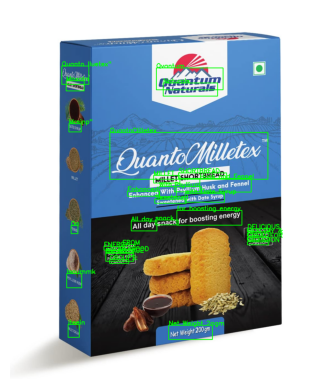

In [64]:
def preprocess_image(image):
    #image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding to handle varying lighting conditions
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY_INV, 11, 2)
    
    # Remove noise with median blur
    denoised = cv2.medianBlur(thresh, 3)
    
    # Resize image if necessary
    height, width = denoised.shape
    if width > 1000:
        scaling_factor = 1000 / width
        new_size = (1000, int(height * scaling_factor))
        resized = cv2.resize(denoised, new_size, interpolation=cv2.INTER_LINEAR)
    else:
        resized = denoised
    
    return denoised
    
image_path = r"D:\Programs\DataScience\AmazonML\images\sample\test\2.jpg"
image = cv2.imread(image_path)
processed_image = image #preprocess_image(image) #rotated_image
reader = easyocr.Reader(["en"])  # Specify language(s)
results = reader.readtext(processed_image)

# Print the results
for (bbox, text, prob) in results:
    print(f"Detected text: {text} with confidence {prob}")

image = np.ascontiguousarray(processed_image, dtype=np.uint8)

for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

# Convert the image to RGB (for displaying with matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()



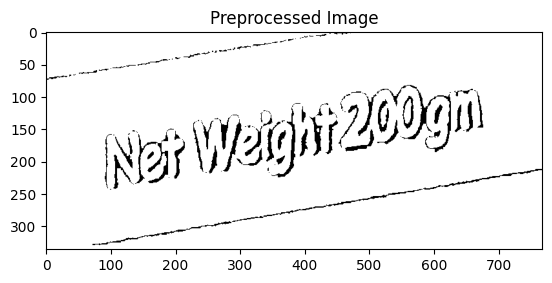

d:\Programs\DataScience\AmazonML\env\lib\site-packages\easyocr\detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(tr

Extracted Text: (Z0dgm1 Neff Weigi


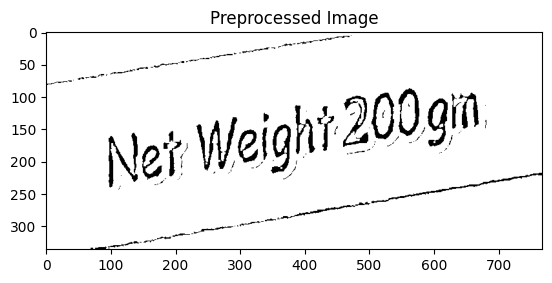

Extracted Text: 200g1, Nek Weight =


In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr

def preprocess_image(image_path, invert=False):
    # Read the image

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if invert:
        image = cv2.bitwise_not(image)
    
    # 1. Resize the image (Upscale the image to make text more readable)
    image = cv2.resize(image, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
    
    # 2. Denoise or Blur the image (using GaussianBlur)
    #blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    denoised_image = cv2.fastNlMeansDenoising(image, None, 15, 7, 21)
    
    # 3. Sharpen the image (using a kernel)
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharpened_image = cv2.filter2D(denoised_image, -1, kernel)
    
    # 4. Apply adaptive thresholding (after blurring)
    thresh_image = cv2.adaptiveThreshold(sharpened_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                         cv2.THRESH_BINARY, 11, 2)  
    
    # 5. Apply dilation to thicken the text
    kernel_dilate = np.ones((3, 3), np.uint8)  # Kernel size (3,3) can be adjusted
    dilated_image = cv2.dilate(thresh_image, kernel_dilate, iterations=1)

    # # 6. Optional: Apply erosion if dilation causes issues
    # kernel_erode = np.ones((3, 3), np.uint8)  # Smaller erosion kernel
    # eroded_image = cv2.erode(dilated_image, kernel_erode, iterations=1)
    
    # 5. Increase contrast
    contrast_enhanced_image = cv2.convertScaleAbs(dilated_image, alpha=2, beta=0)
    
    
    return contrast_enhanced_image

def perform_ocr(image_path, invert=False):
    # Preprocess the image
    processed_image = preprocess_image(image_path, invert)
    
    # Display the processed image
    plt.imshow(processed_image, cmap='gray')
    plt.title('Preprocessed Image')
    plt.show()

    # Initialize EasyOCR Reader
    reader = easyocr.Reader(['en'])  # Specify language; 'en' is for English
    
    # Perform OCR on the processed image
    result = reader.readtext(processed_image)
    
    # Extract and print the text from the result
    extracted_text = " ".join([text[1] for text in result])
    print("Extracted Text:", extracted_text)

    return extracted_text

# Example usage
image_path = "41ADVPQgZOL/010.jpg" 
image_path = "output/011.jpg"
extracted_text = perform_ocr(image_path)
extracted_text2 = perform_ocr(image_path, invert=True)




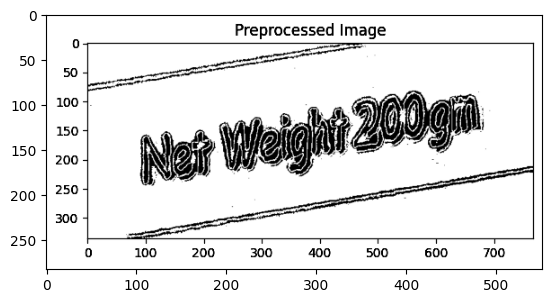

In [97]:
img1 = cv2.imread("../output1.png")
img2 = cv2.imread("../output2.png")
new_image = cv2.add(cv2.bitwise_not(img1), cv2.bitwise_not(img2))
plt.imshow(cv2.bitwise_not(new_image))
plt.show()

In [ ]:
import cv2
import easyocr
import numpy as np
import os
from google.colab import files
import matplotlib.pyplot as plt
import re

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Define the unit mapping
unit_map = {
    "width": {
        "centimetre", "cm", "foot", "ft", "millimetre", "mm", "metre", "m", "inch", "in", "yard", "yd"
    },
    "depth": {
        "centimetre", "cm", "foot", "ft", "millimetre", "mm", "metre", "m", "inch", "in", "yard", "yd"
    },
    "height": {
        "centimetre", "cm", "foot", "ft", "millimetre", "mm", "metre", "m", "inch", "in", "yard", "yd"
    },
    "item_weight": {
        "milligram", "mg", "kilogram", "kg", "microgram", "µg", "gram", "g", "ounce", "oz", "ton", "pound", "lb"
    },
    "maximum_weight_recommendation": {
        "milligram", "mg", "kilogram", "kg", "microgram", "µg", "gram", "g", "ounce", "oz", "ton", "pound", "lb"
    },
    "voltage": {
        "millivolt", "mV", "kilovolt", "kV", "volt", "V"
    },
    "wattage": {
        "kilowatt", "kW", "watt", "W"
    },
    "item_volume": {
        "cubic foot", "ft³", "microlitre", "µL", "cup", "fluid ounce", "fl oz", "centilitre", "cL", "imperial gallon", "gal", "pint", "pt", "decilitre", "dL", "litre", "L", "millilitre", "mL", "quart", "qt", "cubic inch", "in³", "gallon", "gal"
    }
}

# Generate regex pattern from unit_map
def generate_unit_pattern(unit_map):
    units = set()
    for unit_set in unit_map.values():
        units.update(unit_set)
    
    # Escape special regex characters and join units into a pattern
    escaped_units = [re.escape(unit) for unit in units]
    pattern = r'\b\d+(?:[\.,]\d+)?\s*(?:' + '|'.join(escaped_units) + r')\b'
    return pattern

# Compile the regular expression pattern
unit_pattern = generate_unit_pattern(unit_map)

def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Resize image
    height, width = image.shape[:2]
    new_size = (width * 2, height * 2)
    resized = cv2.resize(image, new_size, interpolation=cv2.INTER_CUBIC)

    # Convert to grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

    # Denoise the image
    denoised = cv2.fastNlMeansDenoising(gray, None, 30, 7, 21)

    # Sharpen the image using kernel
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(denoised, -1, kernel)

    # Apply adaptive thresholding
    thresholded = cv2.adaptiveThreshold(sharpened, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 11, 2)

    return resized, gray, denoised, sharpened, thresholded

def display_images(original, gray, denoised, sharpened, thresholded):
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Grayscale Image')
    plt.imshow(gray, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Denoised Image')
    plt.imshow(denoised, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title('Sharpened and Thresholded Image')
    plt.imshow(thresholded, cmap='gray')
    plt.axis('off')

    plt.show()

def extract_numbers_and_units(text):
    # Use the generated regex pattern to find numbers and units
    matches = re.findall(unit_pattern, text, re.IGNORECASE)
    return matches

# Upload a single image
uploaded = files.upload()

# Process the uploaded image
for filename in uploaded.keys():
    image_path = os.path.join('/content', filename)
    original_image = cv2.imread(image_path)

    # Save the uploaded file
    with open(image_path, 'wb') as f:
        f.write(uploaded[filename])

    # Preprocess the image
    resized, gray, denoised, sharpened, thresholded = preprocess_image(image_path)

    # Display images
    display_images(original_image, gray, denoised, sharpened, thresholded)

    # OCR on preprocessed image
    text_results = reader.readtext(thresholded)

    # Display extracted text with confidence
    print(f"Filename: {filename}")
    for text in text_results:
        bbox, extracted_text, confidence = text
        print(f"Extracted Text: {extracted_text}, Confidence: {confidence:.2f}")

    # Extract all text for further processing
    full_text = ' '.join([text[1] for text in text_results])

    # Extract numbers and units
    numbers_and_units = extract_numbers_and_units(full_text)

    # Display numbers and units
    print(f"Numbers and Units: {', '.join(numbers_and_units)}\n")